데이터 과학자가 갖춰야 할 기본 기술 중 하나는 데이터 시각화다. 시각화를 만드는 것은 아주 쉽지만, **좋은 시각화**를 만드는 것은 상당히 어렵다.

데이터 시각화에는 두 가지 목적이 있다.
- 데이터 탐색(exploration)
- 데이터 전달(communication)

이 장에서는 데이터를 탐색하는 방법을 배운다.

## matplotlib

matplotlib는 오래됐지만 널리 사용되고 있는 라이브러리이다.
웹을 위한 복잡하고 인터랙티브한 시각화에는 적합하지 않지만, 간단한 막대 그래프, 선 그래프, 산점도를 그릴 땐 나쁘지 않다.

`pyplot`은 시각화를 단계별로 간편하게 만들 수 있는 구조로 되어 있다.  
완성되면 `savefig()`로 저장하거나 `show()`로 화면에 출력할 수 있다.

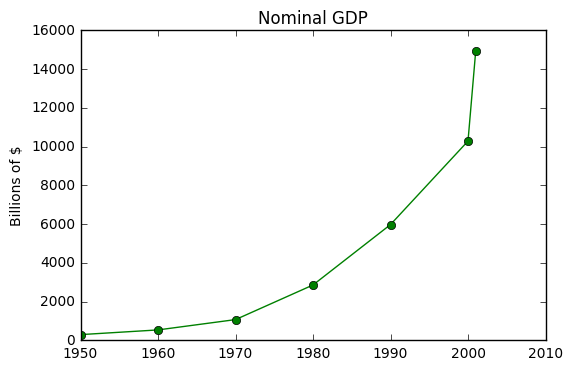

In [3]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2001]
gdp  = [300.2, 543.3, 1075.9, 2862.5, 5979.7, 10289.7, 14958.3]

# x축에 연도, y축에 GDP가 있는 선 그래프를 그려보자
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# 제목
plt.title('Nominal GDP')

# y축에 레이블을 더하자
plt.ylabel('Billions of $')
plt.show()

### 막대 그래프 (Bar chart)

이산적인 항목들에 대한 변화를 보여줄 때 사용하면 좋다. (이산적 = discrete, 별개의)

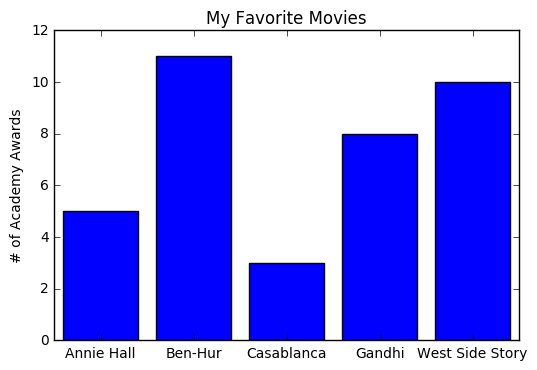

x축: [0.1, 1.1, 2.1, 3.1, 4.1]
y축: [5, 11, 3, 8, 10]
xticks: [0.5, 1.5, 2.5, 3.5, 4.5]


In [23]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# 막대 너비 기본값은 0.8
# 막대가 가운데 올 수 있게 0.1씩 더해준다
xs = [i + 0.1 for i, _ in enumerate(movies)]

# 왼편으로부터 x축의 위치가 xs이고, 높이가 num_oscar인 막대 그래프
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# 막대의 가운데에 오도록 영화 제목 레이블을 달자
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

print 'x축:', xs
print 'y축:', num_oscars
print 'xticks:', [i + 0.5 for i, _ in enumerate(movies)]

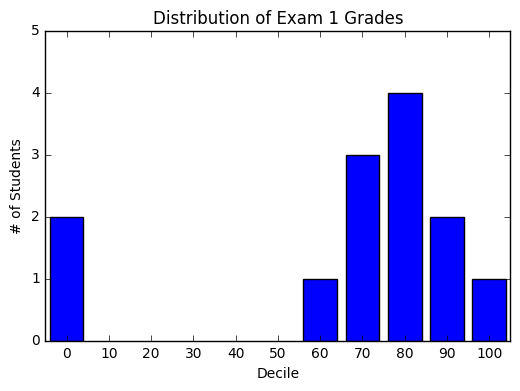

x축: [0, 100, 70, 80, 90, 60]
y축: [2, 1, 3, 4, 2, 1]
xticks: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [30]:
from collections import Counter
# 히스토그램을 그려볼 수도 있다
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
decile = lambda grade: grade // 10 * 10 # 10분위수로 처리한다. 87 -> 80
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()], # 막대를 왼쪽으로 4만큼 옮긴다
       histogram.values(), # 높이는 횟수
       8) # 너비 8, 0부터 100점까지 각 구간의 너비가 10이므로, 8로 정해 막대간 공간이 생기게 한다

# x축은 -5에서 105, y축은 0에서 5
# 0, 100에 해당하는 막대라 잘리지 않게 하기 위함이다
plt.axis([-5, 105, 0, 5])
plt.xticks([10 * i for i in range(11)]) # x축 레이블은 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()


print 'x축:', histogram.keys()
print 'y축:', histogram.values()
print 'xticks:', [10 * i for i in range(11)]

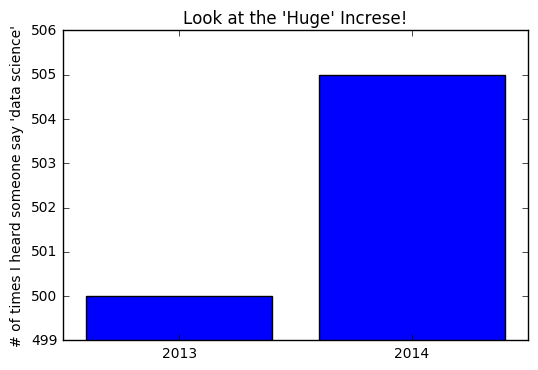

In [45]:
# 막대 그래프를 그릴 때 y축이 0부터 시작하지 않으면 오해를 불러일으킬 수 있다
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# 이렇게 하지 않으면 matplotlib이 x축에 0, 1 레이블을 달고
# 주변부에 +2.013e3라고 표기해둔다. ㅠㅠ
plt.ticklabel_format(useOffset=False)

# 오해를 불러일으키는 y축은 500이상의 부분만 보여준다
plt.axis([2012.5, 2014.5, 499, 506])
plt.title("Look at the 'Huge' Increse!")
plt.show()

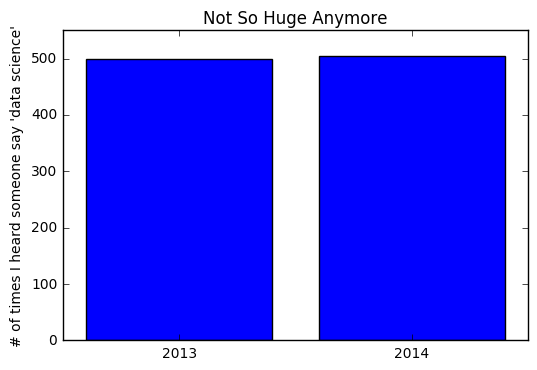

In [47]:
# 실제 차이는 크지 않으므로, 아래처럼 보여주는 것이 합리적이다
# 막대 그래프를 그릴 때 y축이 0부터 시작하지 않으면 오해를 불러일으킬 수 있다
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

plt.axis([2012.5, 2014.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.show()

### 선 그래프 (Line charts)

`plt.plot()`으로 선 그래프를 그릴 수 있다. 이 그래프는 경향성을 보여줄 때 유용하다.

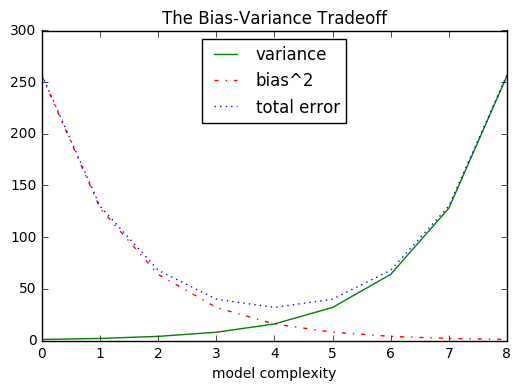

In [54]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# 한 차트에 여러 series를 그리기 위해 plt.plot()을 여러 번 호출할 수 있다
plt.plot(xs, variance, 'g-', label='variance') # 초록색 실선
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # 빨간 색 점선
plt.plot(xs, total_error, 'b:', label='total error') # 파란색 점선

# 각 series에 이미 label을 달아뒀기 때문에 범례(legend)는 어렵지 않게 그릴 수 있다
# 여기서 loc=9는 "top center(위쪽 중앙)"을 의미한다
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

### 산점도 (Scatter plots)

두 변수 간의 연관 관계를 보여주고 싶을 때 적합한 형태의 그래프이다.

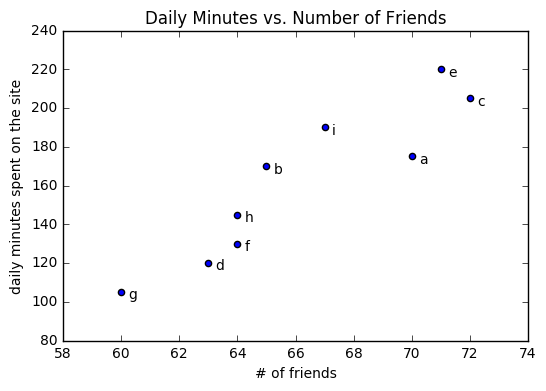

In [65]:
# 예를 들어, 각 사용자의 친구 수와 그들이 매일 사이트에서 체류하는 시간 사이의 연관성을 그려보자
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# 각 포인트에 레이블을 달자
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # label을 데이터 포인트 근처에 두되
                 xytext=(5, -5), # 약간 떨어지게 해두자
                 textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

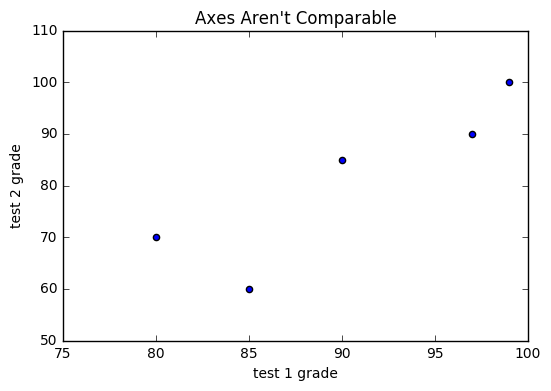

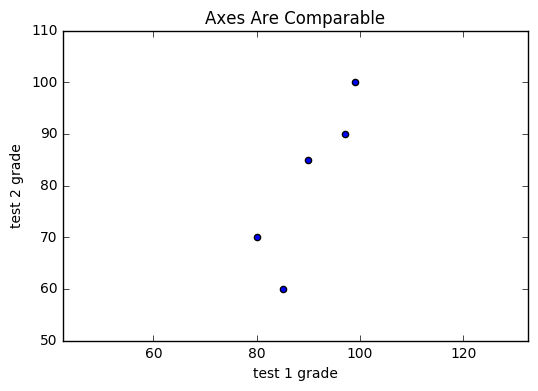

In [75]:
# 산점도는 두 변수 간의 연관 관계를 보여주는데 적합하다고 했다
# 변수들끼리 비교할 때 matplotlib이 자동으로 축의 범위를 설정하게 하면, 공정한 비교가 어려울 수 있다.

test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

# plt.axis("equal") 명령을 추가하면, 각 축의 크기를 동일하게 해서 공정한 비교를 할 수 있게 된다.
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()

그래프를 보면, 같은 범위일 때 test 2에서 대부분의 편차가 발생했다는 사실을 알 수 있다